In [1]:
from nltk.corpus import wordnet as wn
import networkx as nx
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from sys import argv
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

In [2]:
def leskSim(sense1,sense2):#takes two glosses as input
    sent1 = sense1.split()  #aplly tokenization instead here
    sent2 = sense2.split()    
    incmt1=0
    incmt2=0
    leskScr = 0
    count = 0        
   # flag = 0 #this is see if last word was same or not
    while (incmt1<len(sent1)-1) :
        if incmt2 == len(sent2):
            #can shift this in the else     #set it to zero
            incmt2 = 0
            incmt1 = incmt1 + 1

        if  sent1[incmt1] == sent2[incmt2] :                
            count = count + 1       #        flag = 1  #use count codition instead.
            incmt1 = incmt1 + 1
            incmt2 = incmt2 + 1

        else:
            if count>0:#the termination of last ngram found
                leskScr = leskScr + count**2
     #           flag = 0
                count = 0
                incmt2 = 0
            else:
                incmt2 = incmt2 + 1
    if count>0:
        leskScr = leskScr + count**2   
    return leskScr

In [4]:
def overlap(s1,s2):
    s1=set(s1)
    s2=set(s2)    
    return len(s1.intersection(s2))  

In [5]:
def edge_weight(g,sense,layer):
    #lets pass a one sense of a word and the trailing layer.
    #find the corresponding definations
    def1 = wn.synset(sense).definition()
    def2 = {}    
    for i in range(len(layer)):        
            def2[i] = wn.synset(layer[i]).definition()
            edge_weight = overlap(def1,def2[i])#pass two sense definitions            
            g.add_edge(sense,layer[i],weight=edge_weight)
            

In [6]:
def graph(sent1):#takes two sentence and generates wordsense graph
    G = nx.Graph()
    tokenizer = RegexpTokenizer(r'\w+')
    s1=set(tokenizer.tokenize(sent1))
    s1 = s1.difference(stopwords)
    s1=list(s1)
    dict1={}

    for i in range(len(s1)):
        dict1[i] = [str(k) for k in wn.synsets(s1[i])]  #all the word senses of i th word here
        dict1[i] = [re.findall(r"'(.*?)'",o)[0] for o in dict1[i]]    
        
    for i in dict1.keys():
        G.add_nodes_from(dict1[i])

    #here all the nodes are added
    #add the edges to it
    for l in dict1.keys():
        for senses in dict1[l]:
            if l<(len(dict1)-1):           
                edge_weight(G,senses,dict1[l+1])
    return G

In [7]:
def senseAssignment(senseDict,Ranks):
    SenseLst=[]
    for word in senseDict:        
        maxRank=0
        Sense=""
        for sense in senseDict[word]:                        
            if maxRank < Ranks[sense]:
                maxRank=Ranks[sense]
                Sense = sense 
        try:
            SenseLst.append(wn.synset(Sense).definition())            
        except:
            SenseLst.append("NA")
    return SenseLst

All the bank robbers were wearing masks
She chopped the vegetables with a chef’s pointed knife

In [8]:
sentense='She chopped the vegetables with a chef’s pointed knife'
G=graph(sentense)
ranks = nx.pagerank(G,alpha=0.4)
tokenizer = RegexpTokenizer(r'\w+')
s1=set(tokenizer.tokenize(sentense))
s1 = s1.difference(stopwords)
s1=list(s1)

dict1={}
for i in range(len(s1)):
    dict1[i] = [str(k) for k in wn.synsets(s1[i])]  #all the word senses of i th word here
    dict1[i] = [re.findall(r"'(.*?)'",o)[0] for o in dict1[i]]


senseLst = senseAssignment(dict1,ranks)
for i in range(len(dict1)):
    print (s1[i],":",senseLst[i],"\n")


chopped : form or shape by chopping 

vegetables : edible seeds or roots or stems or leaves or bulbs or tubers or nonsweet fruits of any of numerous herbaceous plant 

knife : edge tool used as a cutting instrument; has a pointed blade with a sharp edge and a handle 

She : NA 

chef : a professional cook 

pointed : indicate a place, direction, person, or thing; either spatially or figuratively 



In [119]:
ranks

{'indicate.v.02': 0.024196025403383743,
 'orient.v.01': 0.02209801270169187,
 'charge.v.17': 0.02384635661976843,
 'steer.v.01': 0.02384635661976843,
 'bespeak.v.01': 0.02384635661976843,
 'luff.v.01': 0.023147019052537805,
 'point.v.07': 0.023147019052537805,
 'point.v.08': 0.022447681485307184,
 'point.v.09': 0.024196025403383743,
 'point.v.10': 0.024196025403383743,
 'target.v.01': 0.023496687836153118,
 'point.v.12': 0.024196025403383743,
 'sharpen.v.07': 0.022447681485307184,
 'point.v.14': 0.024196025403383743,
 'pointed.a.01': 0.02209801270169187,
 'pointed.s.02': 0.024196025403383743,
 'chef.n.01': 0.1905631840727794,
 'chop.v.01': 0.026797977545787013,
 'chop.v.02': 0.026297660085382535,
 'chop.v.03': 0.029646254914204903,
 'chop.v.04': 0.02924619218651845,
 'chop.v.05': 0.027198040273473466,
 'chop.v.06': 0.0264483087621717,
 'chopped.s.01': 0.02799816572884637,
 'vegetable.n.01': 0.06965342603202611,
 'vegetable.n.02': 0.06835098367439452,
 'knife.n.01': 0.02700008647749583,

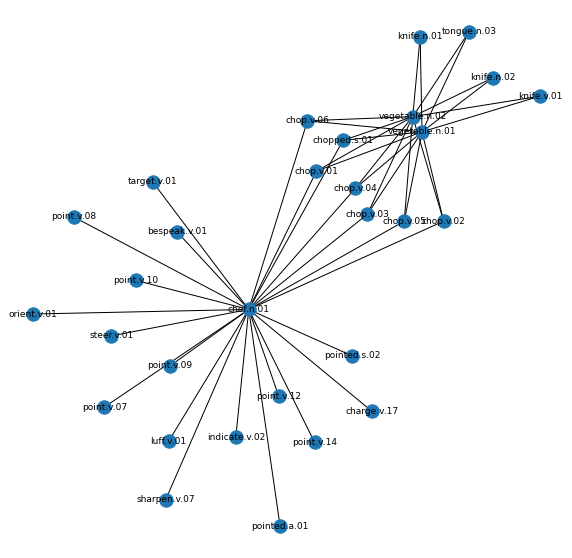

In [120]:
edges = [(u, v) for (u, v, d) in G.edges(data=True)]
pos = nx.spring_layout(G)  # positions for all nodes
# nodes\
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G, pos, node_size=180)
# edges
nx.draw_networkx_edges(G, pos, edgelist=edges, width=1)
nx.draw_networkx_labels(G, pos, font_size=9, font_family='sans-serif')
plt.draw()
plt.axis('off')
plt.show()